In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import csv

In [3]:
def csv_from_excel():
    wb = xlrd.open_workbook('img.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open('img.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel()

In [22]:
df = pd.read_csv('img.csv')
dk=df.drop('Unnamed: 0', axis=1, inplace=False)

In [23]:
dk.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
img = np.asarray(dk.fillna(0))

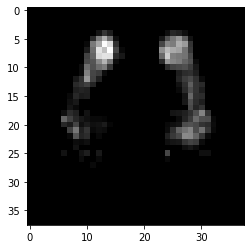

In [25]:
plt.imshow(img, cmap='gray')

In [26]:
uint_img = np.array(img*255).astype('uint8')
grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)

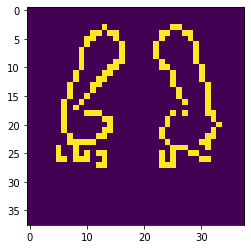

In [27]:
edges = cv2.Canny(grayImage, 100, 255)

plt.imshow(edges)

In [33]:
indices = np.where(edges != [0])
coordinates = list(zip(indices[0], indices[1]))

In [34]:
coordinates

[(3, 13),
 (3, 25),
 (3, 26),
 (4, 11),
 (4, 12),
 (4, 14),
 (4, 15),
 (4, 23),
 (4, 24),
 (4, 27),
 (4, 28),
 (5, 10),
 (5, 11),
 (5, 15),
 (5, 23),
 (5, 28),
 (6, 10),
 (6, 16),
 (6, 22),
 (6, 29),
 (7, 9),
 (7, 16),
 (7, 22),
 (7, 29),
 (8, 9),
 (8, 16),
 (8, 22),
 (8, 29),
 (9, 9),
 (9, 15),
 (9, 16),
 (9, 23),
 (9, 29),
 (10, 9),
 (10, 14),
 (10, 15),
 (10, 23),
 (10, 24),
 (10, 30),
 (11, 8),
 (11, 13),
 (11, 14),
 (11, 25),
 (11, 30),
 (12, 8),
 (12, 12),
 (12, 13),
 (12, 25),
 (12, 30),
 (13, 7),
 (13, 11),
 (13, 12),
 (13, 25),
 (13, 31),
 (14, 7),
 (14, 11),
 (14, 26),
 (14, 31),
 (15, 7),
 (15, 10),
 (15, 26),
 (15, 31),
 (16, 6),
 (16, 9),
 (16, 27),
 (16, 31),
 (17, 6),
 (17, 8),
 (17, 31),
 (18, 6),
 (18, 10),
 (18, 11),
 (18, 12),
 (18, 25),
 (18, 27),
 (18, 31),
 (18, 32),
 (19, 6),
 (19, 13),
 (19, 14),
 (19, 24),
 (19, 32),
 (20, 6),
 (20, 14),
 (20, 24),
 (20, 33),
 (21, 6),
 (21, 13),
 (21, 14),
 (21, 23),
 (21, 32),
 (22, 7),
 (22, 12),
 (22, 13),
 (22, 23),
 (22, 

In [35]:
for coordinate in coordinates:    
     if img[coordinate[0]][coordinate[1]] > 0:
         print(coordinate,"---->", img[coordinate[0]][coordinate[1]])


(4, 12) ----> 7.0
(4, 14) ----> 10.0
(4, 24) ----> 5.0
(4, 27) ----> 5.0
(5, 11) ----> 15.0
(5, 15) ----> 5.0
(5, 23) ----> 8.0
(5, 28) ----> 6.0
(6, 10) ----> 3.0
(7, 16) ----> 3.0
(8, 16) ----> 8.0
(9, 15) ----> 4.0
(9, 23) ----> 14.0
(9, 29) ----> 4.0
(10, 9) ----> 4.0
(10, 14) ----> 18.0
(10, 24) ----> 15.0
(11, 13) ----> 4.0
(12, 8) ----> 8.0
(12, 12) ----> 11.0
(12, 30) ----> 4.0
(13, 11) ----> 12.0
(14, 26) ----> 3.0
(15, 7) ----> 3.0
(15, 10) ----> 10.0
(16, 27) ----> 8.0
(17, 8) ----> 3.0
(18, 6) ----> 5.0
(18, 10) ----> 6.0
(18, 25) ----> 7.0
(18, 27) ----> 11.0
(18, 31) ----> 17.0
(19, 6) ----> 33.0
(19, 13) ----> 2.0
(19, 32) ----> 3.0
(20, 6) ----> 13.0
(20, 14) ----> 2.0
(20, 24) ----> 3.0
(21, 13) ----> 4.0
(21, 32) ----> 3.0
(22, 7) ----> 3.0
(22, 12) ----> 3.0
(22, 31) ----> 4.0
(23, 8) ----> 4.0
(23, 9) ----> 3.0
(23, 10) ----> 5.0
(23, 24) ----> 5.0
(23, 30) ----> 4.0
(24, 8) ----> 6.0
(24, 27) ----> 5.0
(25, 10) ----> 10.0
(25, 12) ----> 8.0
(26, 9) ----> 4.0
